In [1]:
from IPython.display import Image

Note: The following images and intuition comes from [this video](https://www.youtube.com/watch?v=XepXtl9YKwc)

## Overview

Note: The following images and intuition comes from [this video](https://www.youtube.com/watch?v=XepXtl9YKwc)

Maximum Likelihood Estimators are used to approximate probability distributions, given some data.

Though we don't have every single data point that could possibly fall within a distribution, we can arrive at a decent guess for the parameters that define a distribution the data we *do* have.

In other words:

>Given an assumed distribution of data and a number of data points, what is the likelihood that these points fit the distribution?

For instance, looking at a dataset like the one below, it's likely appropriate to say that the data fits a normal distribution-- it's mostly-symmetrical and centered around a mean value.

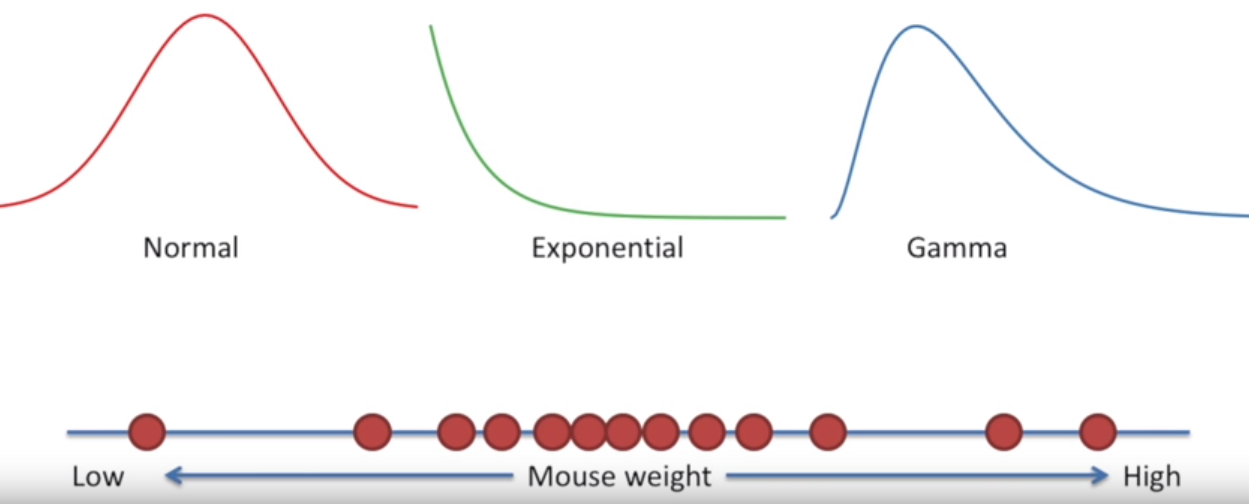

In [2]:
Image('../images/mle_1.PNG')

Because a normal distribution is defined by its mean and standard deviation, if we were so inclined, we could:

1. Iterate through a bunch of candidate mean values (holding standard deviation constant)
2. Check the probability of each point falling into a distribution defined by that mean and stddev
3. Multiply the probabilities for each point for the overall sample likelihood
4. Take the value for the mean that maximizes likelihood

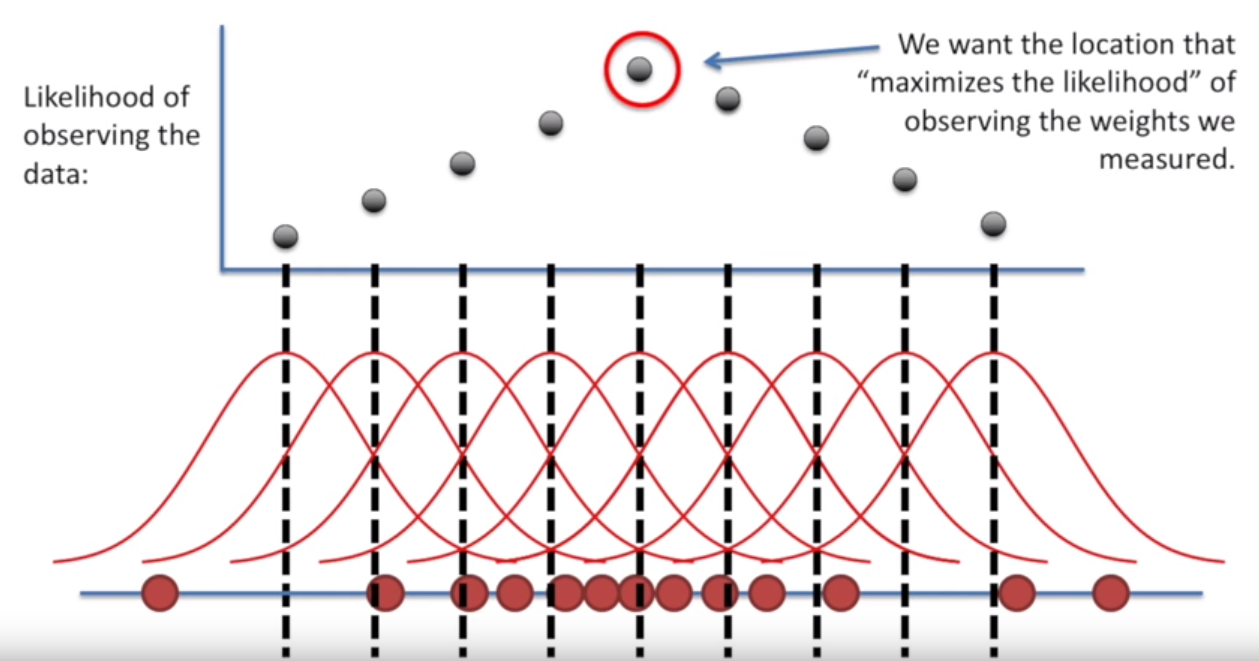

In [3]:
Image('../images/mle_2.PNG')

Then holding that mean constant, we could repeat the exercise, but for different values of the standard deviation.

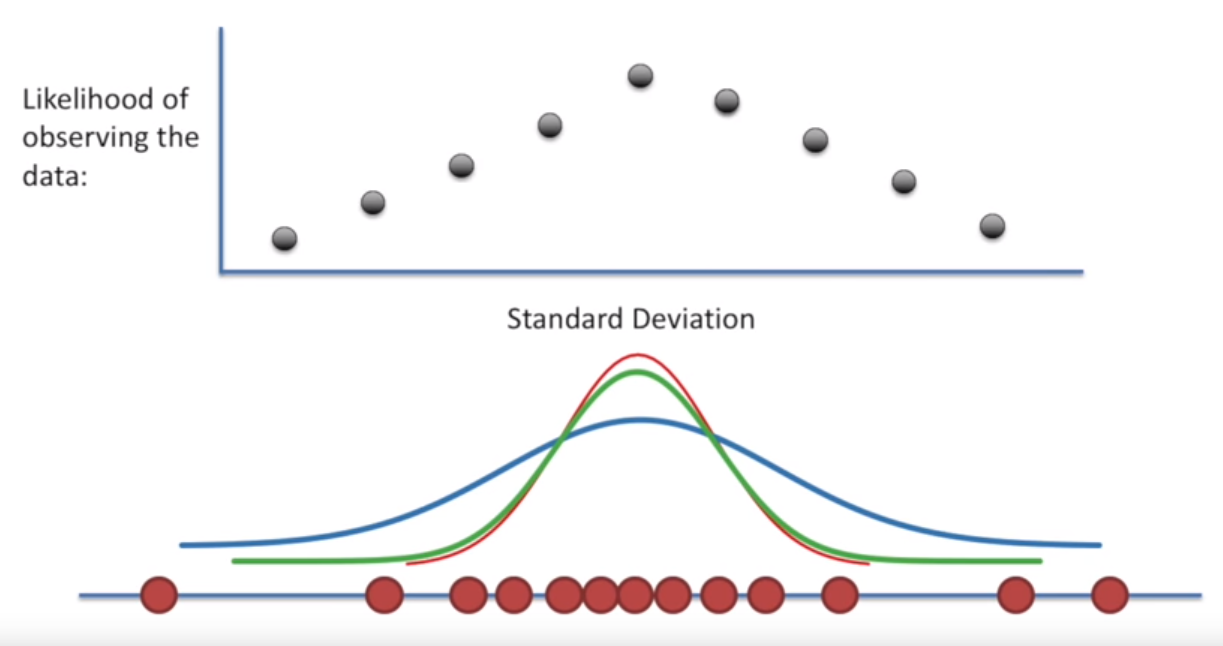

In [4]:
Image('../images/mle_3.PNG')

### Example: Normal Distribution (Closed Solution)

Fortunately, the behavior of Maximum Likelihood Estimators is well-understood for data that fits known distributions.

Following along with [this video](https://www.youtube.com/watch?v=Dn6b9fCIUpM), if we wanted to get the likelihood of a point appearing within a normal distribution with given mean and standard deviation, we would employ the density function below

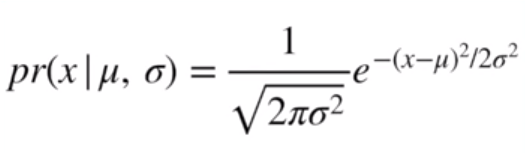

In [5]:
Image('../images/mle_norm_1.PNG')

Thus, a poor guess of a mean of 20 makes it seriously unlikely that our observed data point of 32 belongs to this distribution

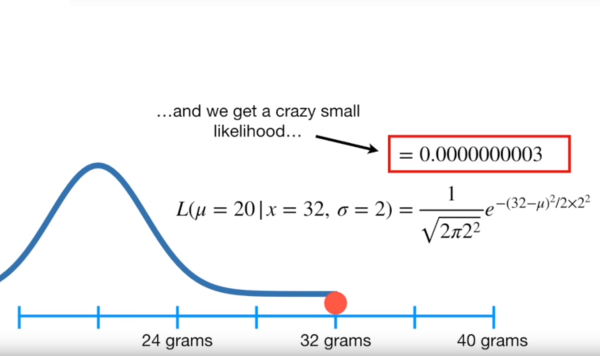

In [6]:
Image('../images/mle_norm_2.PNG')

As above, this likelihood is maximized at the mean of our data, and we can inspect for the standard deviation

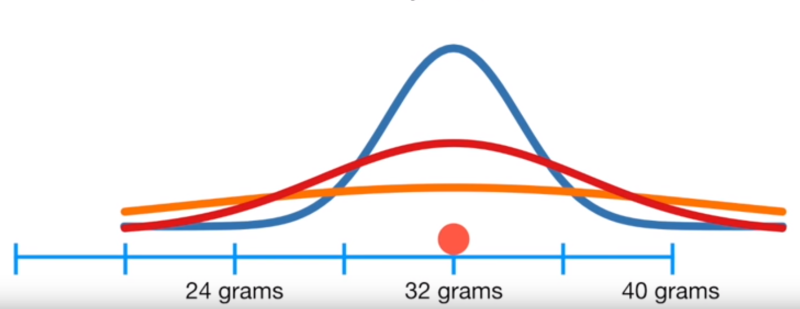

In [7]:
Image('../images/mle_norm_3.PNG')

Alternatively, we can just *solve* for the correct values, using Math™

For *n* independent points, we can describe the joint likelihood of each point falling into a normal distribution with a given mean and stddev with the following equation

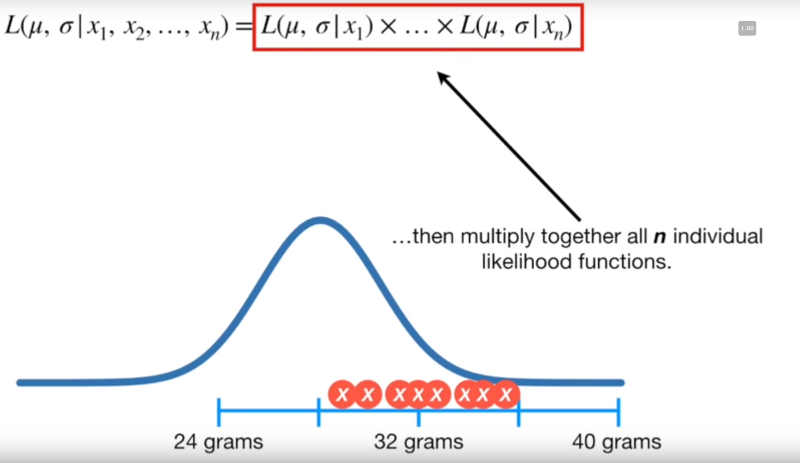

In [8]:
Image('../images/mle_norm_4.PNG')

Written out, it looks like this

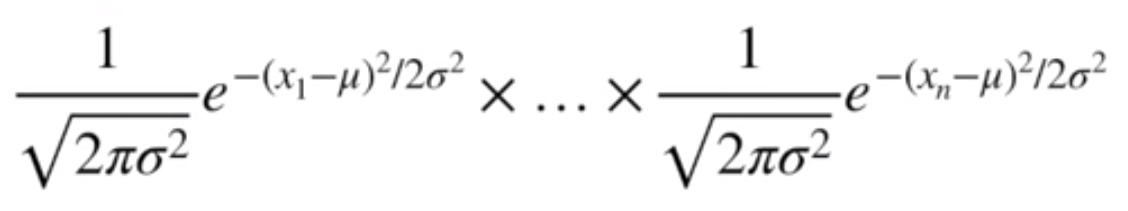

In [9]:
Image('../images/mle_norm_5.PNG')

Because we're trying to maximize the values of mu and sigma, we're going to be doing some calculus to find the points where the derivative is equal to zero

First, though, we're going to take the log of all of the terms. This lets us enjoy an easier time doing the math gymnastics...

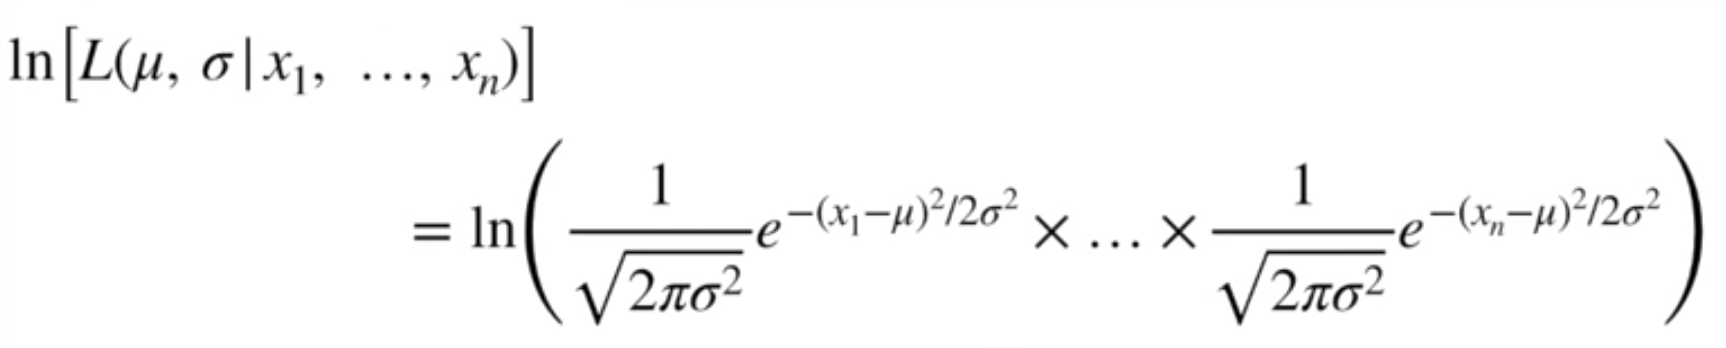

In [10]:
Image('../images/mle_norm_6.PNG')

... and will still give us the same value where the derivative, because the log function is monotonically increasing

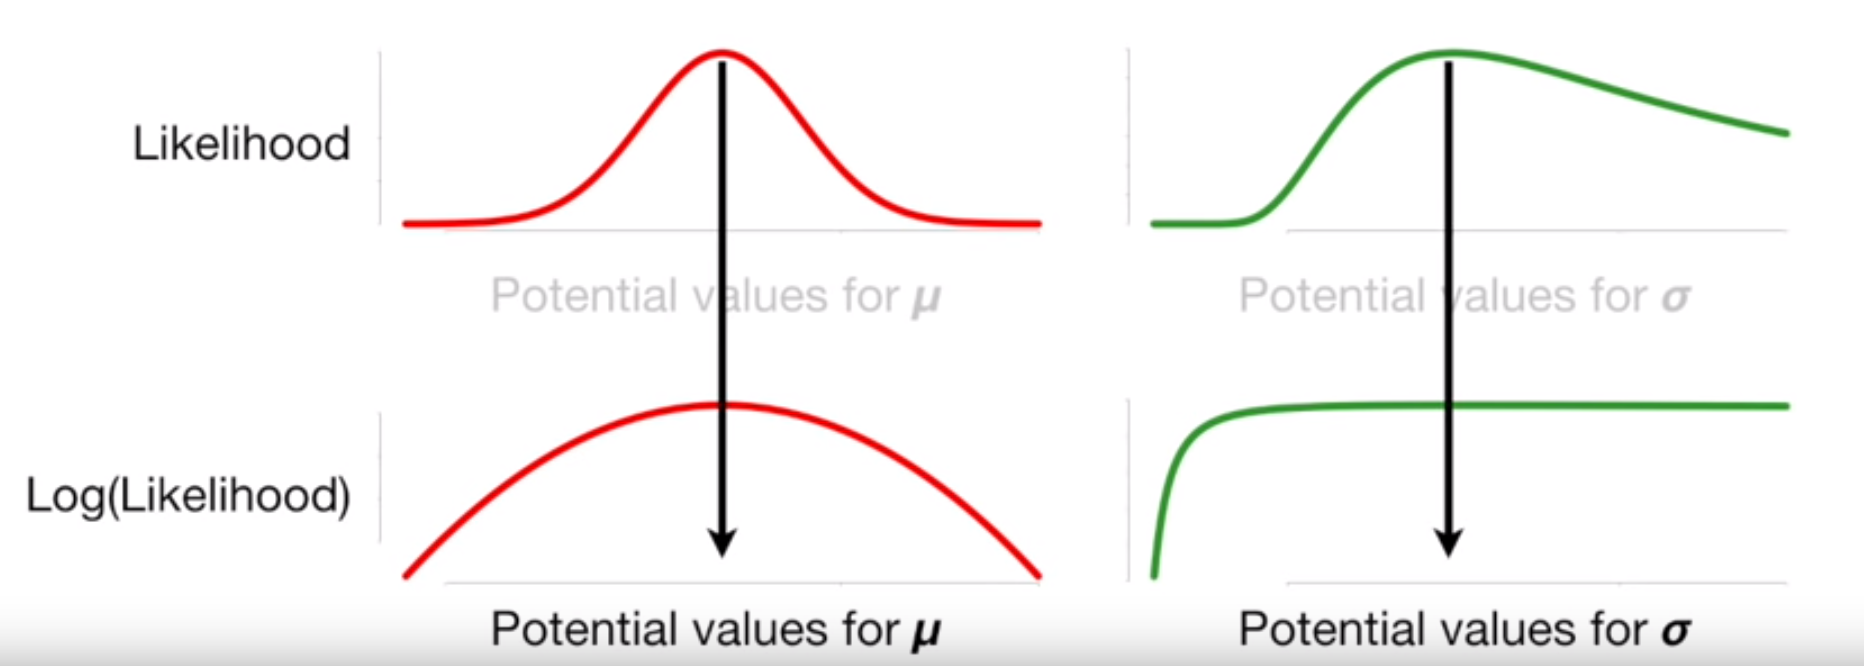

In [11]:
Image('../images/mle_norm_7.PNG')

After a bunch of working (watch the video above if you want a step-by-step), we arrive at the optimal value for the mean being the mean of the sample data

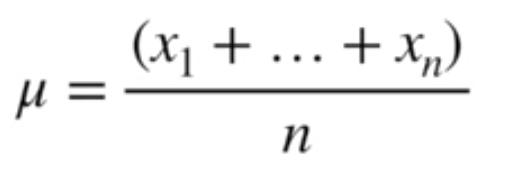

In [12]:
Image('../images/mle_norm_8.PNG')

And similarly, the optimal value for the stddev being the stddev of the sample data.

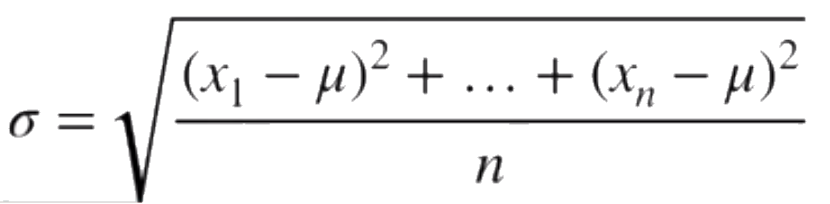

In [13]:
Image('../images/mle_norm_9.PNG')

While that should be pretty obvious, a few things should jump out at this point:

- We were able to express the joint likelihood in generic terms of mu and sigma
- Taking the log of all of our terms makes for easier computation and yields the same results
- Our hand-mathing arrives at a simple, known, *closed* solution that will yield the correct results

### Example: GANs (Non-closed Solution)

So in the instance of a Generative Adversarial Network, we've got two probability distributions that seed the whole shebang:

- `p_data(x)`: The "probability distribution" that defines the composition of our input data
- `p_z(z)`: Some noise vector (usually uniform or normal, with dimensions (1, N), n >= 100ish) that seeds the latent space of the Generator

From there, we've got two MLPs:

- `G(z)`: Learns the underlying data distribution of p_data to make fake images
- `D(x)`: Learns probability that a sample came from our dataset and not the Generator

The cost function has no closed-form solution and is represented by

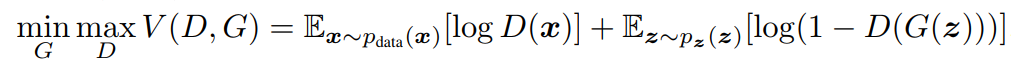

In [14]:
Image('../images/mle_gans.PNG')

However, the vectors `x` and `z` can represent many data points, giving us huge summands in `D()` and `G()`.

Thus, as above, we assume each observation to be independent, and multiply their individual probabilities together to get the joint, and take the log of each so we can add their probabilities together for ease of computation.

In short, though, all a GAN is is two MLE's pitted against one another:

- One is trying to estimate the parameters that define the distribution `p_data`
- One is trying to estimate the parameters that define the data generation distribution

Ultimately, when you consider that the generator, `G()`, is trying to approximate the definition of a distribution *that produces a bunch of seemingly-random* images, you're wading into a serious mess of a definition.

Or as my friend Tung eloquently puts it:

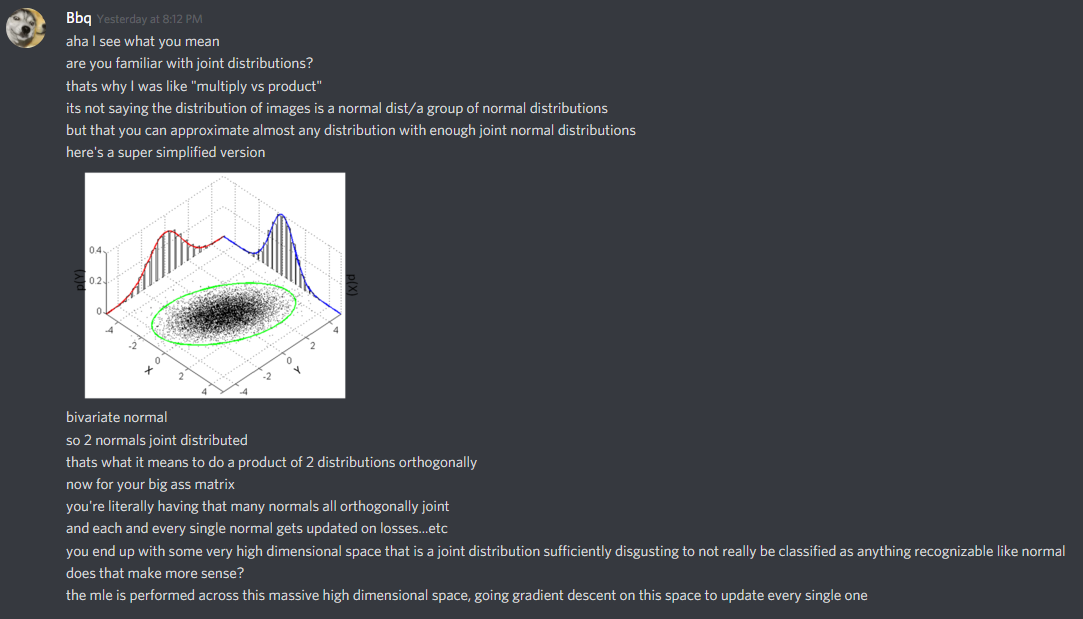

In [15]:
Image('../images/mle_gans_2.PNG')